In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Matrix Inverse
The  inverse  of  matrix  A  is  another  matrix  $$A^{−1}$$  (pronounced  “A  inverse”)  that  multiplies  A  to  produce  the  identity  matrix.  In  other  words,  $$A^{−1}$$ A = I.  That  is  how  you “cancel”  a  matrix.  Another  conceptualization  is  that  we  want  to  linearly  transform a matrix into the identity matrix; the matrix inverse contains that linear transformation,  and  matrix  multiplication  is  the  mechanism  of  applying  that  transformation  to the matrix.
<br>But why do we even need to invert matrices? We need to “cancel” a matrix in order to solve problems that can be expressed in the form Ax=b, where A and b are known quantities and we want to solve for x. The solution has the following general form:
$$
Ax = b 
$$
$$
A^{-1}Ax = A^{-1}b
$$
$$
Ix = A^{-1}b
$$
$$
x = A^{-1}b
$$

### Types of Inverses and Conditions for Invertibility
1. <i>Full Inverse</i>:- <br> This  means  $$A^{−1}A=AA^{−1}=I$$.  There  are  two  conditions  for  a  matrix  to  have a  full  inverse:  <br>(1)  square  and  (2)  full-rank. <br> Every  square  full-rank  matrix  hasan  inverse,  and  every  matrix  that  has  a  full  inverse  is  square  and  full-rank.
2. <i>One-sided inverse</i>:- <br> A one-sided inverse can transform a rectangular matrix into the identity matrix,but  it  works  only  for  one  multiplication  order.  <br>In  particular,  a  tall  matrix  T  can have a left-inverse, meaning <b> LT=I but TL≠I.</b> And a wide matrix W can have a right-inverse, meaning that<b> WR=I but RW≠I.</b><br>A nonsquare matrix has a one-sided inverse only if it has the maximum possible rank.  That  is,  a  tall  matrix  has  a  left-inverse  if  it  is  rank-N  (full  column  rank) while a wide matrix has a right-inverse if it is rank-M (full row rank).
3. <i>Pseudoinverse</i>:-<br>Every matrix has a pseudoinverse, regardless of its shape and rank. If the matrix is  square  full-rank,  then  its  pseudoinverse  equals  its  full  inverse.  Likewise,  if  the matrix is nonsquare and has its maximum possible rank, then the pseudoinverse equals  its  left-inverse  (for  a  tall  matrix)  or  its  right-inverse  (for  a  wide  matrix).<br>But a reduced-rank matrix still has a pseudoinverse, in which case the pseudoinverse  transforms  the  singular  matrix  into  another  matrix  that  is  close  but  not equal to the identity matrix.

#### Matrices that do not have a full or one-sided inverse are called singular or non-invertible. That is the same thing as labeling a matrix reduced-rank or rank-deficient.

### Computing the Inverse
#### Inverse of a 2 × 2 Matrix
<a id = "inverse_2x2"> </a>
To  invert  a  2 × 2  matrix,  swap  the  diagonal  elements,  multiply  the  off-diagonal  elements  by  −1,  and  divide  by  the  determinant.  That  algorithm  will  produce  a  matrix that transforms the original matrix into the identity matrix.
$$
A = \begin{bmatrix} a & b\\ c & d\end{bmatrix}
$$
$$
A^{-1} = 1 / ad - bc \begin{bmatrix} d & -b\\ -c & a\end{bmatrix}
$$
$$
AA^{-1} = \begin{bmatrix} a & b\\ c & d\end{bmatrix} 1 / ad - bc \begin{bmatrix} d & -b\\ -c & a\end{bmatrix}
$$
$$
AA^{-1} = 1 / ad - bc \begin{bmatrix} ad - bc & 0\\ 0 & ad - bc\end{bmatrix}
$$
$$
AA^{-1} = \begin{bmatrix} 1 & 0\\ 0 & 1\end{bmatrix}
$$

#### Reduced-rank matrices do not have an inverse, and programs like Python won’t even try  to  calculate  one.  However,  this  matrix  does  have  a  pseudoinverse.  

In [2]:
# In Python
A = np.array([[1,4],[2,7]])
A_inv = np.linalg.inv(A)
A@A_inv

array([[1., 0.],
       [0., 1.]])

### Inverse of a Diagonal Matrix
There  is  also  a  shortcut  to  compute  the  inverse  of  a  square  diagonal  matrix.  The insight that leads to this shortcut is that the product of two diagonal matrices is simply  the  diagonal  elements  scalar  multiplied. The trick is that you simply invert each diagonal element while ignoring the off-diagonal zeros.

## Inverting Any Square Full-Rank Matrix
<a id="inverting_square_matrix"> </a>
The algorithm to compute the inverse involves four intermediate matrices, called the minors, grid, cofactors, and adjugate matrices:
1. <i>The minors matrix</i> :-This  matrix  comprises  determinants  of  submatrices.  Each  element  mi,j  of  the minors  matrix  is  the  determinant  of  the  submatrix  created  by  excluding  the  ith row  and  the  jth  column.  Figure  8-2  shows  an  overview  of  the  procedure  for  a 3 × 3 matrix.<br>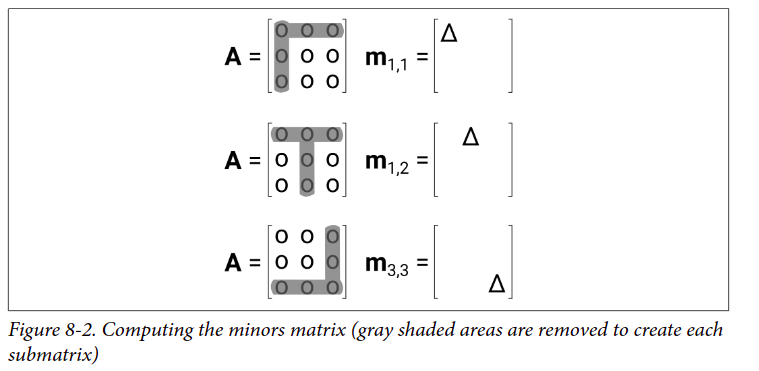<br>
2. <i>The grid matrix</i> :-The  grid  matrix  is  a  checker board  of  alternating  +1s  and  −1s.  It  is  computed using the following formula: <br> $$ g_{i,j} = -1^{i+j} $$ <br>
3. <i>The cofactors matrix</i> :-The  cofactors  matrix  is  the  Hadamard  multiplication  of  the  minors  matrix  with the grid matrix.<br>
4. <i>Adjugate matrix</i> :-This  is  the  transpose  of  the  cofactors  matrix,  scalar  multiplied  by  the  inverse  of the determinant of the original matrix (the matrix you are computing the inverse of, not the cofactors matrix).The adjugate matrix is the inverse of the original matrix.<br>

Figure 8-3 shows   the   four   intermediate   matrices,   the   inverse   returned   by <b>np.linalg.inv</b>,  and  the  identity  matrix  resulting  from  the  multiplication  of  the original  matrix  with  its  inverse  computed  according  to  the  procedure  previously described. The original matrix was a random-numbers matrix.
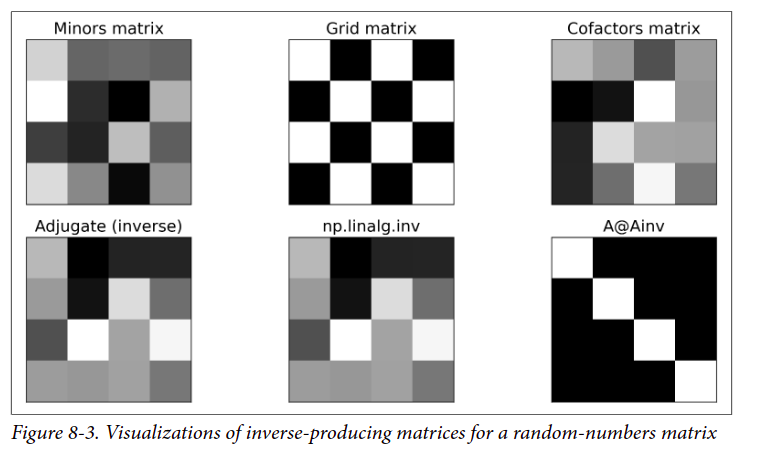

### One-Sided Inverses
A tall matrix does not have a full inverse. That is, for matrix T of size M > N, there is no tall matrix $$T^{−1}$$ such that 
$$TT^{−1} = T^{−1}T = I$$.<br>
But  there  is  a  matrix  L  such  that  LT=I. Our  goal  now  is  to  find  that  matrix.  We start by making matrix T square by multiplying matrix T with its transpose. Should we compute $$T^TT or TT^T$$.<br>
$$T^TT$$ is  full-rank  if  T  is  full  column-rank. 
$$
(T^T)^{-1} (T^TT) = I
$$
From the formula, we can see that because $$ T^TT is not the same matrix as T, (T^TT)^{−1} is not the inverse of T. $$ <br>We’re  looking  for  a  matrix  that  left-multiplies  Tto  produce  the  identity  matrix; we  don’t  actually  care  what  other  matrices  need to  multiply  to  produce  that  matrix.  So  let’s  break  apart  and  regroup  the  matrix multiplications:
$$
L = (T^T)^{-1} T^T
$$
$$
LT = I
$$
That matrix L is the left-inverse of matrix T.<br>
The left-inverse  is  defined  only  for  tall  matrices  that  have  full  column-rank.  A  matrix  ofsize M > N with rank r < N does not have a left-inverse. Because $$T^TT$$ is reduced-rank and thus cannot be inverted.

## The Inverse Is Unique
The  matrix  inverse  is  unique,  meaning  that  if  a  matrix  has  an  inverse,  it  has  exactly one  inverse.  There  cannot  be  two  matrices  B  and  C  such  that  AB = I  and  AC = I while B≠C.


## Moore-Penrose Pseudoinverse
Pseudoinverses  are  transformation  matrices  that  bring  a  matrix  close  to  the  identity matrix.  Although  the  full  matrix  inverse  is  unique, the  pseudoinverse  is  not  unique.  A  reduced-rank  matrix  has  an  infinite  number of  pseudoinverses. The  pseudoinverse  is  implemented  in  Python  using  the  function  <b>np.linalg.pinv.

### Numerical Stability of the Inverse
We learned  in  Chapter  6  that the  determinant  of  a matrix can be numerically unstable, and therefore computing many determinants can lead to numerical inaccuracies, which can accumulate and cause significant problems when working with large matrices.For  this  reason,  the  low-level  libraries  that  implement  numerical  computations  (for example, LAPACK) generally strive to avoid explicitly inverting matrices when possible,  or  they  decompose  matrices  into  the  product  of  other  matrices  that  are  more numerically stable.<br>
Matrices that have numerical values in  roughly the same range tend to  be more stable(though  this  is   not  guaranteed),  which  is   why  random-numbers  matrices  are  easy  to work  with.  But  matrices  with  a  large  range  of    numerical  values  have  a  high  risk  of numerical instability.<br> The “range of numerical values” is more formally captured as thecondition number of a matrix, which is the ratio of the largest to smallest singular value.
An  example  of  a  numerically  unstable  matrix  is  a  Hilbert  matrix.  Each  element  in  aHilbert matrix is defined by the simple formula shown in Equation 8-1.
<a id="hilbert"></a>
#### Equation 8-1. Formula to create a Hilbert matrix. i and j are row and column indices.
$$
h_{i,j} = 1 / i + j - 1
$$

# Code Exercises

### Question 8-1.The inverse of the inverse is the original matrix; in other words, $$(A^{−1})^{−1}=A$$. This is analgous to how 1/(1/a)=a. Illustrate this using Python.

In [3]:
A = np.random.randn(6,6)
print(A)
A_inv = np.linalg.inv(A)
A_inv_inv = np.linalg.inv(A_inv)
print(np.round(A,2)==np.round(A_inv_inv,2))
print(np.round(A,2)-np.round(A_inv_inv,2))

[[ 0.99806143 -1.19186692  0.70529868 -0.40043255 -2.74231885 -1.11893593]
 [-0.3398752  -1.52115609 -0.76550432  0.63882521  0.42316003  2.03896966]
 [ 0.37052589 -1.39285251 -0.30155719 -0.61242856 -0.03148294 -0.54546555]
 [-0.07686586  2.38841015  0.6614959   0.39242794 -1.31089668 -1.74088541]
 [ 0.89354856 -0.20669665 -0.04073816  0.55523447  0.44553021 -1.14055565]
 [ 0.65856746  0.54621076  1.37172143 -1.07951853  0.02946891  0.42354776]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


### Question 8-2. Implement  the  full  algorithm  described  in  [“Inverting  Any  Square  Full-Rank  Matrix”](#inverting_square_matrix) reproduce  Figure  8-3.  Of  course,  your  matrices  will  look  different from Figure 8-3 because of random numbers, although the grid and identity matrices will be the same.

In [4]:
def get_minor_matrix(matrix, row, col):
    minor = np.delete(matrix, row, axis=0)  # Remove the specified row
    minor = np.delete(minor, col, axis=1)  # Remove the specified column
    return np.linalg.det(minor)

m = 5
A = np.random.randn(m,m)
minor = np.zeros((m,m))
grid = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        minor[i,j] = get_minor_matrix(A, i ,j)
        grid[i,j] = (-1)**(i+j)

cofactors = minor*grid
adjugate = cofactors.T / np.linalg.det(A)
#or
# 'regular' inverse function
adjugate_ = np.linalg.inv(A)

# compare against inv()
np.round(adjugate,2)-np.round(adjugate_ ,2)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

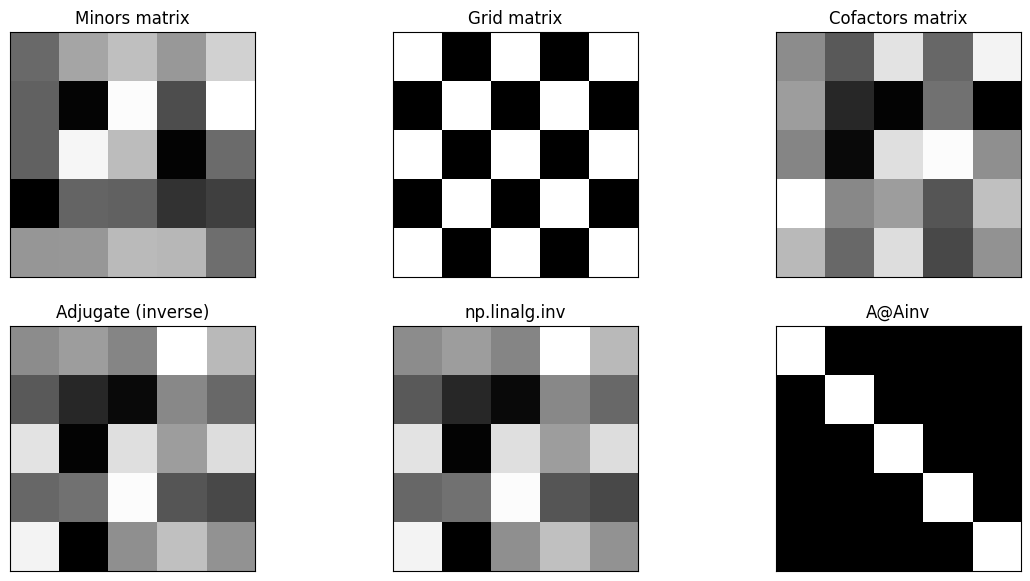

In [5]:
# plot them

fig,axs = plt.subplots(2,3,figsize=(14,7))

axs[0,0].imshow(minor,cmap='gray')
axs[0,0].set_title('Minors matrix')

axs[0,1].imshow(grid,cmap='gray')
axs[0,1].set_title('Grid matrix')

axs[0,2].imshow(cofactors,cmap='gray')
axs[0,2].set_title('Cofactors matrix')

axs[1,0].imshow(adjugate,cmap='gray')
axs[1,0].set_title('Adjugate (inverse)')

axs[1,1].imshow(adjugate_,cmap='gray')
axs[1,1].set_title('np.linalg.inv')

axs[1,2].imshow(A@adjugate,cmap='gray')
axs[1,2].set_title('A@Ainv')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])

plt.show()

### Question 8-4. Derive  the  right-inverse  for  wide  matrices  by  following  the  logic  that  allowed  us  to discover  the  left-inverse.  Then  reproduce  Figure  8-4  for  a  wide  matrix.  (Hint:  start from the code for the left-inverse and adjust as necessary.)

In [6]:
wide = np.random.randint(-10,11 , size = (4,40))
print( f'This matrix has rank = {np.linalg.matrix_rank(wide)}\n\n' )
widewideT = wide@wide.T
widewideT_inv = np.linalg.inv(widewideT)
print( np.round(widewideT_inv@widewideT,4) )

This matrix has rank = 4


[[ 1. -0.  0.  0.]
 [-0.  1.  0. -0.]
 [ 0. -0.  1. -0.]
 [-0. -0. -0.  1.]]


In [7]:
Right = wide.T @ widewideT_inv
# confirm that it works
print( np.round( wide@Right,6 ) ), print(' ')

# but it's one-sided!
print( np.round( Right@wide,2 ) )

[[ 1.  0. -0.  0.]
 [-0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [-0.  0. -0.  1.]]
 
[[ 0.1   0.04 -0.03 ... -0.01 -0.04  0.03]
 [ 0.04  0.08 -0.01 ... -0.01  0.02  0.08]
 [-0.03 -0.01  0.05 ...  0.03 -0.   -0.02]
 ...
 [-0.01 -0.01  0.03 ...  0.03  0.   -0.03]
 [-0.04  0.02 -0.   ...  0.    0.16 -0.01]
 [ 0.03  0.08 -0.02 ... -0.03 -0.01  0.11]]


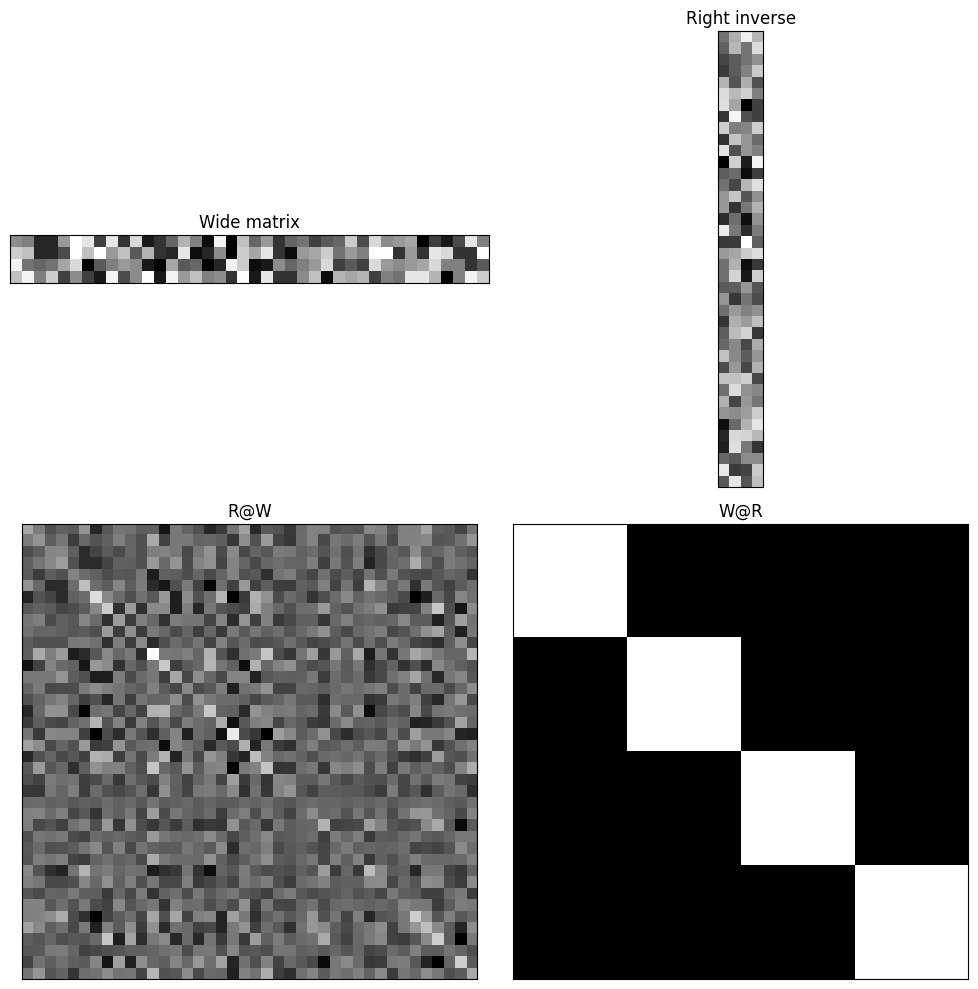

In [8]:
# visualize

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(wide,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(Right,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(Right@wide,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(wide@Right,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.show()

### Question 8-5. Illustrate  in  Python  that  the  pseudoinverse  (via  np.linalg.pinv)  equals  the  full inverse  (via  np.linalg.inv)  for  an  invertible  matrix.  <br>Next,  illustrate  that  the  pseudoinverse equals the left-inverse for a tall full column-rank matrix, and that it equals the right-inverse for a wide full row-rank matrix.


In [9]:
#Full Inverse
A = np.random.randn(5,5)
print(np.round(np.linalg.pinv(A) - np.linalg.inv(A),2))

[[-0. -0. -0.  0.  0.]
 [ 0. -0.  0. -0.  0.]
 [ 0. -0.  0. -0.  0.]
 [ 0. -0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [10]:
# left inverse case
M,N = 14,4

A = np.random.randn(M,N)

ALeft = np.linalg.inv(A.T@A) @ A.T
Apinv = np.linalg.pinv(A)

np.round( ALeft-Apinv,10 )

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,
         0.],
       [-0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0.,
        -0.],
       [-0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,
        -0.],
       [-0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,
         0.]])

In [11]:
# right inverse case
M,N = 4,14

A = np.random.randn(M,N)

ARight = A.T @ np.linalg.inv(A@A.T)
Apinv  = np.linalg.pinv(A)

np.round( ARight-Apinv,10 )

array([[-0.,  0.,  0.,  0.],
       [-0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.],
       [-0.,  0., -0.,  0.],
       [ 0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.],
       [-0.,  0., -0., -0.],
       [ 0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0.],
       [ 0., -0.,  0., -0.],
       [ 0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.],
       [-0.,  0., -0.,  0.]])

### Question 8-6.The  LIVE  EVIL  rule  applies  to  the  inverse  of  multiplied  matrices.  Test  this  in  code by  creating  two  square  full-rank  matrices  A  and  B,  then  use  Euclidean  distance  to compare  <br>$$ (1) AB^{−1},  (2)  A^{−1}B^{−1},  and  (3)  B^{−1}A^{−1}.$$ <br>  Before  starting  to  code,  make  a prediction  about  which  results  will  be  equal.  Print  out  your  results  using  formatting like the following:- <br> Distance between (AB)^-1 and (A^-1)(B^-1) is ___<br>Distance between (AB)^-1 and (B^-1)(A^-1) is ___<br>As  an  extra  challenge,  you  can  confirm  that  the  LIVE  EVIL  rule  applies  to  a  longer string of matrices, e.g., four matrices instead of two

In [12]:
# create the matrices
N = 4
A = np.random.randn(N,N)
B = np.random.randn(N,N)

# compute the three specified options
op1 = np.linalg.inv(A@B)
op2 = np.linalg.inv(A) @ np.linalg.inv(B)
op3 = np.linalg.inv(B) @ np.linalg.inv(A)

# compute distances
dist12 = np.sqrt(np.sum( (op1-op2)**2 ))
dist13 = np.sqrt(np.sum( (op1-op3)**2 ))

# print results!
print(f'Distance between (AB)^-1 and (A^-1)(B^-1) is {dist12:.8f}')
print(f'Distance between (AB)^-1 and (B^-1)(A^-1) is {dist13:.8f}')

Distance between (AB)^-1 and (A^-1)(B^-1) is 23.56878603
Distance between (AB)^-1 and (B^-1)(A^-1) is 0.00000000


### Question 8-7. Does   the   LIVE   EVIL   rule   also   apply   to   the   one-sided   inverse?   That   is,   does $$(T^TT)^{−1}=T^{‐T}T^{−1}?$$  As  with  the  previous  exercise,  make  a  prediction  and  then  test it in Python.

In [13]:
# create the matrices
M,N = 14,4
T = np.random.randn(M,N)

# compute the three specified options
op1 = np.linalg.inv(T.T@T)
op2 = np.linalg.inv(T) @ np.linalg.inv(T.T)
# The answer is No, it doesn't work, because a tall matrix has no inverse.

LinAlgError: Last 2 dimensions of the array must be square

### Question 8-8.Write  code  to  reproduce  Figure  8-6.  Start  by  copying  the  code  from  Exercise  7-3. After  reproducing  the  figure,  make  the  transformation  matrix  non-invertible  by  setting the lower-left element to 1. What else needs to be changed in the code to prevent errors?<br>
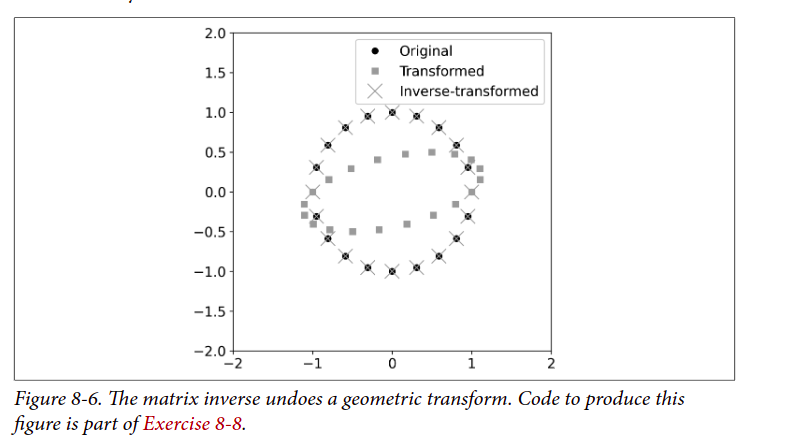

/tmp/ipykernel_93273/621838561.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(backTransformed[0,:],backTransformed[1,:],'rx',markersize=15,


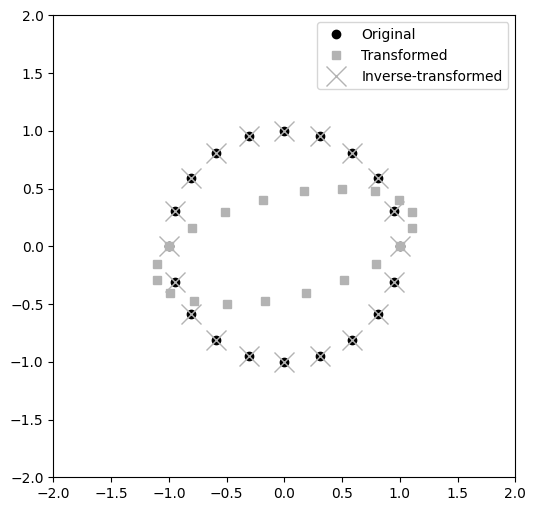

In [14]:
# Transformation matrix
T = np.array([ 
              [1,.5],
              [0,.5]
            ])

# Compute its inverse
Ti = np.linalg.inv(T)


# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints

# undo the transformation via the inverse of the transform
backTransformed   = Ti @ transformedPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')
plt.plot(backTransformed[0,:],backTransformed[1,:],'rx',markersize=15,
         color=[.7,.7,.7],label='Inverse-transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.show()

### Question 8-9. This  and  the  next  exercise  will  help  you  explore  the  matrix  inverse  and  its  risk  ofnumerical  instability,  using  the  Hilbert  matrix.  Start  by  creating  a  Hilbert  matrix.Write a Python function that takes an integer as input and produces a Hilbert matrixas output, following [Equation 8-1](#hilbert). Then reproduce Figure 8-5<br>.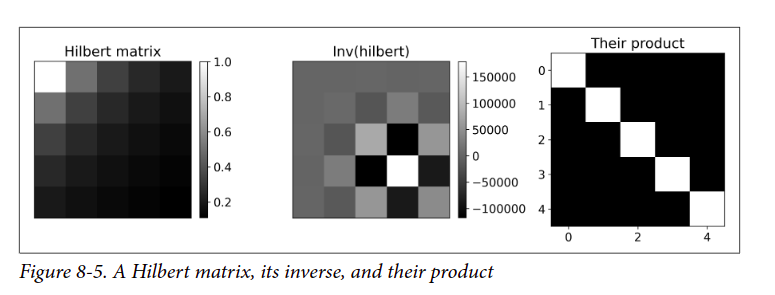 <br>I  recommend  writing  your  Python  function  using  a  double  for  loop  over  the  rowsand  columns  (i  and  j  matrix  indices),  following  the  math  formula.  Once  you  con‐firm  that  the  function  is  accurate,  you  can  optionally  challenge  yourself  to  rewritethe  function  without  any  for  loops  (hint:  outer  product).  You  can  confirm  theaccuracy  of  your  function  by  comparing  it  to  the  hilbert  function,  which  is  in  thescipy.linalg library.

In [15]:
# note: the math formula has denominator: i+j-1
#   but with 0-based indexing, this is: (i+1)+(j+1)-1
#   which can be shortened to: i+j+1
def create_hilbert_matrix(m):
    h = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            h[i,j] = 1 / (i+j + 1)
    return h

def hilbert_without_loops(m):
  m = np.arange(1,m+1).reshape(1,-1)
  return 1 / (m.T+m-1)

print( hilbert_without_loops(5) )
print(create_hilbert_matrix(5)) 
print(' ')

# you can confirm the accuracy of your function against the scipy Hilbert-matrix function:
from scipy.linalg import hilbert
print( hilbert(5) )

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
 
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


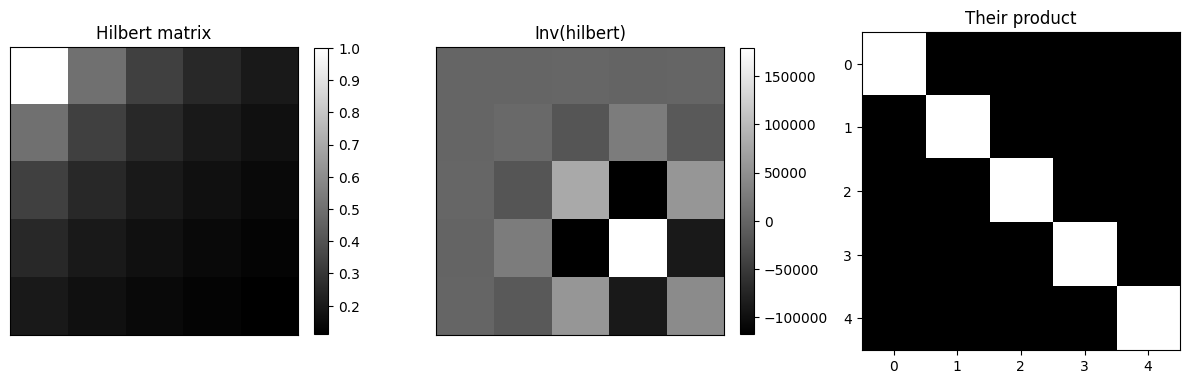

In [16]:
# create a 5x5 Hilbert matrix and show it, its inverse, and their product
H = hilbert(5)
Hi = np.linalg.inv(H)

fig,axs = plt.subplots(1,3,figsize=(12,6))
h = [0,0,0]

# the matrix
h[0] = axs[0].imshow(H,cmap='gray')
axs[0].set_title('Hilbert matrix')

# its inverse
h[1] = axs[1].imshow(Hi,cmap='gray')
axs[1].set_title('Inv(hilbert)')

# their product
h[2] = axs[2].imshow(H@Hi,cmap='gray')
axs[2].set_title('Their product')


for i in range(2):
  fig.colorbar(h[i],ax=axs[i],fraction=.045)
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.show()

### Question 8-10. Using your Hilbert matrix function, create a Hilbert matrix, then compute its inverse using  np.linalg.inv,  and  compute  the  product  of  the  two  matrices.<br>  That  product should  equal  the  identity  matrix,  which  means  the  Euclidean  distance  between  that product  and  the  true  identity  matrix  produced  by  np.eye  should  be  0  (within  com‐puter rounding error). Compute that Euclidean distance.<br>
### Put  this  code  into  a  for  loop  over  a  range  of  matrix  sizes  ranging  from  3 × 3  to 12 × 12. For each matrix size, store the Euclidean distance and the condition number of  the  Hilbert  matrix.  As  I  wrote  earlier,  the  condition  number  is  a  measure  of  thespread  of  numerical  values  in  the  matrix,  and  can  be  extracted  using  the  functionnp.linalg.cond.<br>
### Next, repeat the previous code, but using a Gaussian random-numbers matrix instead of the Hilbert matrix.<br>
### Finally,  plot  all  of  the  results  as  shown  in  Figure  8-7. plot  the  distance  and condition number in log scale to facilitate visual interpretation.<br>
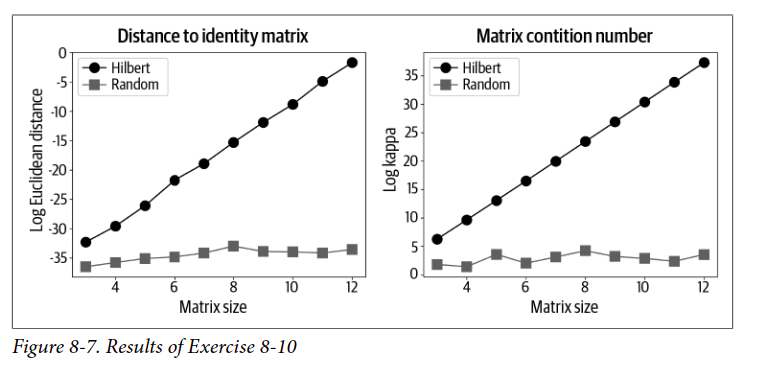<br>


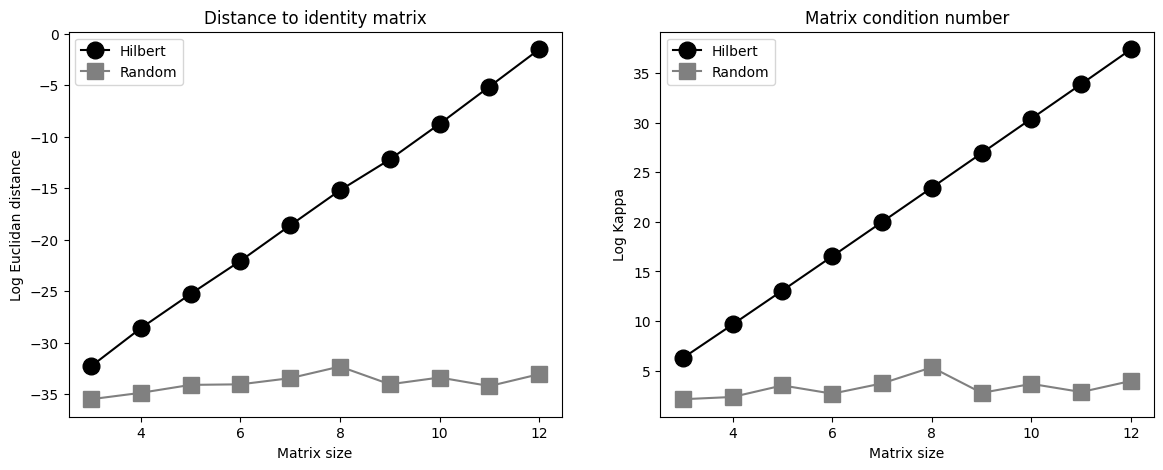

In [17]:
matSizes = np.arange(3,13)

identityError = np.zeros((len(matSizes),2))
condNumbers   = np.zeros((len(matSizes),2))


for i,k in enumerate(matSizes):
    
    ### for the Hilbert matrix
    H   = hilbert(k)       # the matrix
    Hi  = np.linalg.inv(H) # its inverse
    HHi = H@Hi             # should be identity
    err = HHi - np.eye(k)  # difference from true identity
    identityError[i,0] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,0] = np.linalg.cond(H) # condition number
    

    ### repeat for a random matrix
    H = np.random.randn(k,k) # the matrix
    Hi  = np.linalg.inv(H)   # its inverse
    HHi = H@Hi               # should be identity
    err = HHi - np.eye(k)    # difference from true identity
    identityError[i,1] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,1] = np.linalg.cond(H) # condition number
    


# now plot
fig,axs = plt.subplots(1,2,figsize=(14,5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes,np.log(identityError),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')



## plot the condition numbers
h = axs[1].plot(matSizes,np.log(condNumbers),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.show()

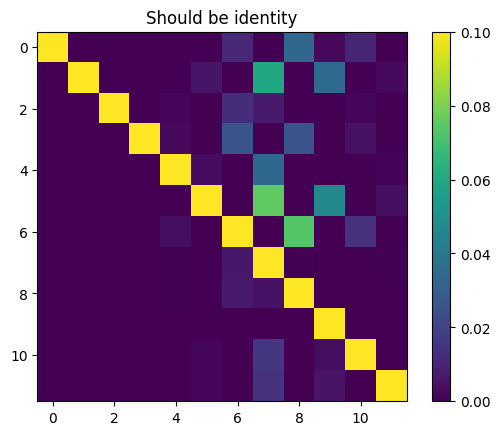

In [18]:
## interesting to see the "identity" matrix
H   = hilbert(k)
Hi  = np.linalg.inv(H)
HHi = H@Hi 

plt.imshow(HHi,vmin=0,vmax=.1)
plt.title('Should be identity')
plt.colorbar();
     